# Practical 1: Power Balancing for a Local Community

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import functions_T1

#Importing the Simulation script
import sys
import os
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
sys.path.insert(0, parent_dir)
from simulation_creator_T1_Balancing import simulation_creator_Balancing

A neighbourhood is connected to the grid as sketched below. For a typical day in the year the neighbourhood has a given demand profile. To cover this demand electricity is taken from the grid.

**Task 1**: The following python code simulates a typical day based on hourly demand data. Run the code and describe what is seen in the plot. (maybe include quick description of what the python code does)

![T1_basecase](Graphics_T1/T1_basecase.png)

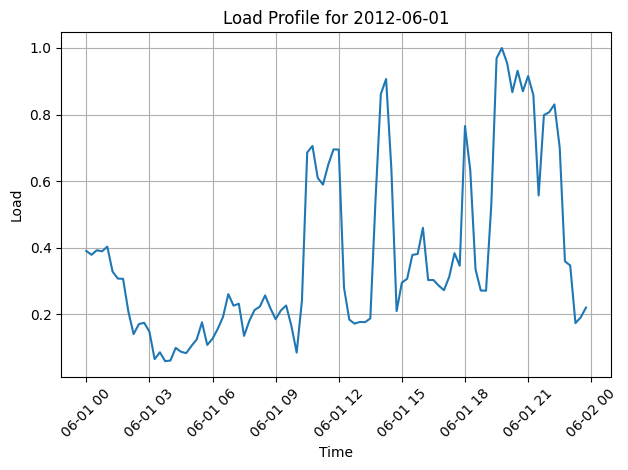

In [12]:
load_df = pd.read_csv('../Scenarios/load_data.txt', delimiter=',', skiprows=1)
load_df['time'] = pd.to_datetime(load_df['time'])
load_df.set_index('time', inplace=True)

#choose which day of the year to plot
day_of_year = "2012-06-01"
plot_load_base_case = functions_T1.plot_load_profile(load_df, day_of_year)

The community implements small scale PV and wind power plants to become more autonomous. Now first the supply from the local renewable energy sources is used to cover the demand in the community. The residual load is then supplied by the grid.

![T1_RES_case](Graphics_T1/T1_RES_case.png)

**Task 2**: Run the following python code and look at the resulting residual load plot. Describe the plot and compare it to the results from task 1. -> include size variations

In [ ]:
day_of_year = "2012-06-01"

#Component Set Up
Components_RES_case = pd.DataFrame()
Components_RES_case['model'] = pd.Series(['Wind', 'PV', 'Load'])

RES_case_simulation = simulation_creator_Balancing(Components_RES_case['model'])

#Input Data Simulation
number_houses = 5    #demand specs

pv_inputs = {'Module_area': 1.26, 'cap':500}
# Optional PV inputs with examples: 'NOCT': 44, 'Module_Efficiency': 0.198, 'Irradiance_at_NOCT': 800,
# 'Power_output_at_STC': 250,'peak_power':600, 'm_tilt':14,'m_az':180

wind_inputs = {'p_rated':300, 'cp':0.40}
#Options for Wind inputs with example values: 'p_rated':300, 'u_rated':10.3, 
# 'u_cutin':2.8, 'u_cutout':25, 'cp':0.40, 'diameter':22, 'output_type':'power'}

#run simulation
RES_case_simulation.create_simulation(day_of_year,number_houses,pv_inputs, wind_inputs)


The residents have decided to implement a community storage, where the electricity generated from the local renewable energy sources is stored when generation exceeds the local demand. The stored energy is used when the local generation cannot cover the demand. (+ Explanation SoC parameter in python script)

![T1_RES_case_Bat](Graphics_T1/T1_RES_case_Bat.png)

**Task 3a)**: Run the following python code that simulates a typical day in the local community with renewable generation and battery storage. For this task the State of charge is 100% in the beginning of the day. The controller acts in the following way: in the case of not enough local generation to cover the demand of the neighbourhood electricity is taken from the battery storage if possible, if this is not possible electricity is taken from the grid. How does the residual load curve change compared to task 2 (the utilization of small scale local renewable generation without storage).

**Task 3b)**: Change the State of charge parameter to 50% in the beginning of the day and run the simulation again. Explain how this affects the residual load curve.

**Task 3c)**: Change the State of charge parameter to 10% in the beginning of the day and run the simulation again. Explain how this affects the residual load curve.

Note: Changing Objective Controller: Contractual/Physical Limit for connection (Peak shaving & Load Shifting, Load Shedding)
EV/Flexibilities

In [ ]:
day_of_year = "2012-06-01"

Components_RES_Bat_case = pd.DataFrame()  
Components_RES_Bat_case['model'] = pd.Series(['Wind', 'PV', 'Load', 'Battery'])

Batery_case_simulation = simulation_creator_Balancing(Components_RES_Bat_case['model'])

#Input Data Simulation
number_houses = 5    #demand specs

pv_inputs = {'Module_area': 1.26, 'cap':500}
# Optional PV inputs with examples: 'NOCT': 44, 'Module_Efficiency': 0.198, 'Irradiance_at_NOCT': 800,
# 'Power_output_at_STC': 250,'peak_power':600, 'm_tilt':14,'m_az':180

wind_inputs = {'p_rated':300, 'cp':0.40}
#Options for Wind inputs with example values: 'p_rated':300, 'u_rated':10.3, 
# 'u_cutin':2.8, 'u_cutout':25, 'cp':0.40, 'diameter':22, 'output_type':'power'}


battery_inputs = {'initial_soc': 0, 'charge_efficiency': 0.9, 'discharge_efficiency': 0.9, 'soc_min': 10}
#Options for Battery inputs with example values :{'initial_soc': 20, 'max_p': 800, 'min_p': -800, 'max_energy': 800, 'charge_efficiency': 0.9, 
# 'discharge_efficiency': 0.9, 'soc_min': 10, 'soc_max': 90}

Batery_case_simulation.create_simulation(day_of_year,number_houses,pv_inputs, wind_inputs,battery_inputs)